In [1]:
ls

drive/  sample_data/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/MyDrive/CNN/Dataset

/content/drive/MyDrive/CNN/Dataset


In [44]:
pwd

'/content/drive/MyDrive/CNN/Dataset'

In [8]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
   creating: TRAIN_SET/APPLES/
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APPLES/116_100.jpg  
  inflating: TRAIN_SET/APPL

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/TRAIN_SET",target_size=(64,64),color_mode='rgb',class_mode="categorical",batch_size=24)


Found 2626 images belonging to 5 classes.


In [20]:
!unzip TEST_SET.zip

unzip:  cannot find or open TEST_SET.zip, TEST_SET.zip.zip or TEST_SET.zip.ZIP.


In [65]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/TEST_SET",target_size=(64,64),color_mode='rgb',class_mode="categorical",batch_size=24)

Found 1055 images belonging to 5 classes.


In [21]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [22]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [28]:
model.add(Dense(5,activation="softmax"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                        

In [30]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))

In [31]:
model.add(Dense(4,activation='softmax'))

In [32]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [33]:
len(x_train)

110

In [66]:
model.fit(x_train,epochs=10,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/10


InvalidArgumentError: ignored

In [35]:
model.save('train.h5')

In [36]:
model.save('dataset.h5')

In [37]:
model.save('fruits.h5')

In [38]:
model.save('nutrition.h5')


In [39]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
model=load_model('train.h5')

In [41]:
model=load_model('dataset.h5')

In [42]:
model=load_model('nutrition.h5')

In [53]:
img=image.load_img("/content/drive/MyDrive/CNN/TEST_SET/APPLES/151_100.jpg")

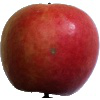

In [54]:
img

In [56]:
img=image.load_img(r"/content/drive/MyDrive/CNN/TEST_SET/APPLES/153_100.jpg",target_size=(64,64))

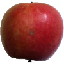

In [57]:
img


In [58]:
x=image.img_to_array(img)

In [59]:
x

array([[[255., 254., 250.],
        [255., 255., 253.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 253.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [60]:
x=np.expand_dims(x,axis=0)

In [61]:
x

array([[[[255., 254., 250.],
         [255., 255., 253.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 253.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [62]:
pred = model.predict
pred

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f3f25fa0f10>>

In [67]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=0)

44/44 [==============================] - 163s 4s/step


In [68]:
predict_x

array([[0.25377902, 0.24592306, 0.25612262, 0.24417533],
       [0.2552273 , 0.24482372, 0.25622797, 0.24372108],
       [0.25458506, 0.24596524, 0.25574273, 0.24370706],
       ...,
       [0.25504774, 0.24588385, 0.2559296 , 0.24313885],
       [0.25385195, 0.24576634, 0.25616944, 0.24421234],
       [0.25371093, 0.24603073, 0.256015  , 0.24424323]], dtype=float32)

In [69]:
classes_x

array([757, 892, 156, 916])

In [70]:
x_test.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [71]:
index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']

In [72]:
index[np.argmax(pred)]

'APPLES'

In [73]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

In [74]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


In [75]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [76]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [77]:

@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launch():
    if request.method=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))

In [ ]:
x=result
print(x)
result=nutrition(result)
print(result)

In [79]:
def nutrition(index):


    url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"
    
    querystring = {"query":index}
    
    headers = {
        'x-rapidapi-key': "5d797ab107mshe668f26bd044e64p1ffd34jsnf47bfa9a8ee4",
        'x-rapidapi-host': "calorieninjas.p.rapidapi.com"
        }
    response = requests.request("GET", url="https://calorieninjas.p.rapidapi.com/v1/nutrition", headers =
                                {
        'x-rapidapi-key': "5d797ab107mshe668f26bd044e64p1ffd34jsnf47bfa9a8ee4",
        'x-rapidapi-host': "calorieninjas.p.rapidapi.com"
        }, params= {"query":index} )
    print(response.text)     
    return response.json()['items']

In [80]:
if __name__ == "__file__":
   # running the app
    app.run(debug=False)